In [2]:
import os
import geopandas as gpd
import geemap
import xml.etree.ElementTree as ET
import pandas as pd
from shapely.geometry import LineString

# constante requerida
#namespace = {"kml": "http://www.opengis.net/kml/2.2"}

In [3]:
# Directorio donde están los archivos KML
path_wayp = r'G:/OneDrive - Ingenio Azucarero Guabira S.A/UTEA_2023/PROYECTO AREA LIBERACION/SEGUIMIENTO2/SEMANA_44/WP_31-10-2023/'
propiedades = os.listdir(path_wayp)
propiedades

['Mara', 'Propirdad Ivar', 'Santa Maria']

In [4]:
list_prop = []
list_lote = []
list_recorrido = []
col = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'Latitude', 'Longitude', 'J', 'K']
for propiedad in propiedades:
    path_prop = path_wayp + propiedad + '/'
    lotes = os.listdir(path_prop)
    for lote in lotes:
        path_lote = path_prop + lote
        df = pd.read_csv(path_lote, sep='\t', names=col, skiprows=1)
        df = df[df['Latitude']!=0]
        gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude))
        line = LineString(gdf.geometry.tolist())
        list_prop.append(propiedad)
        list_lote.append(lote)
        list_recorrido.append(line)

In [6]:
data_lineas = {
    'geometry': list_recorrido,
    'propiedad': list_prop,
    'lotes' : list_lote
}

In [7]:
gdf_lineas = gpd.GeoDataFrame(data_lineas)

In [8]:
gdf_lineas.crs = "EPSG:4326"

In [9]:
gdf_lineas = gdf_lineas.to_crs(epsg=32720)

<AxesSubplot:>

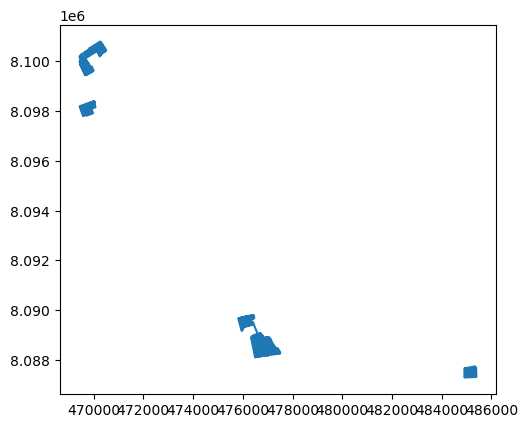

In [10]:
gdf_lineas.plot()

In [11]:
len(gdf_lineas)

8

In [12]:
gdf_lineas.to_file('capa_waypoinst', driver="ESRI Shapefile")